In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

#### Generate data

In [3]:
cs = np.linspace(-0.95, 0.95, 20)
mu = [0, 0]
all_data = np.empty((len(cs), 2, 10000))
cov = np.empty((len(cs),2,2))
for i, c in enumerate(cs):
    cov[i] = [[1, c],[c, 1]]
    all_data[i] = np.random.multivariate_normal(mu,cov[i],10000).T

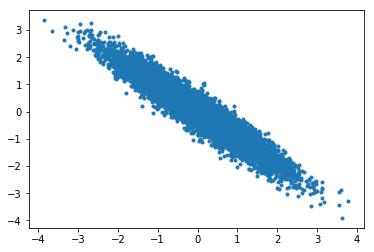

In [4]:
plt.scatter(all_data[0][0],all_data[0][1], marker = '.')

In [303]:
# a , b = np.histogram(data[0], bins = ed)
# x = np.empty(len(ed)-1)
# x = (np.array(ed[1:])+ np.array(ed[:-1]))/2
# S = sum(np.abs(x) * a)
# norm_a = a / S

In [302]:
# Nbins = 1000
# fraction = np.array([1/x for x in np.arange(1,3,0.2)])
# b = direct_mi(data, Nbins = Nbins, fractions = fraction, plot = True)
# print(b)

In [301]:
# Nbins = 100
# fraction = np.array([1/x for x in np.arange(1,3,0.2)])
# b = MI(data, Nbins = Nbins)
# print(b)

In [5]:
def MI(sample, Nbins, e = 10**(-10)):
    x_edges = np.array([np.percentile(sample[0], x) for x in np.linspace(0,100,Nbins)])
    y_edges = np.array([np.percentile(sample[1], x) for x in np.linspace(0,100,Nbins)])
    Px, _ = np.histogram(sample[0], bins = x_edges)
    Py, _ = np.histogram(sample[1], bins = y_edges)
    Pxy, _,_ = np.histogram2d(sample[0], sample[1], bins = (x_edges, y_edges))
    Px_norm = Px/sum(Px)
    Py_norm = Py/sum(Py)
    Pxy_norm = Pxy/sum(sum(Pxy))
    mi = 0
    for x in range(Nbins-1):
        for y in range(Nbins-1):
            if Px_norm[x] == 0: Px_norm[x] = e
            if Py_norm[y] == 0: Py_norm[y] = e
            if Pxy_norm[x,y] == 0: continue
            mi += Pxy_norm[x,y]*np.log2(Pxy_norm[x,y]/(Px_norm[x]*Py_norm[y]))
    return mi

In [6]:
def direct_mi(sample, fractions, Nbins, e = 10**(-6), plot = False):
    x = np.around(sample.shape[1]*fractions)
    curr_mi = np.empty(len(fractions))
    for i,f in enumerate(fractions):
#         print(curr_mi[i])
        curr_mi[i] = MI(sample[:,:int(np.around(sample.shape[1]*f))], Nbins, e)
    k,b = np.polyfit(1/x, curr_mi, 1)
    if plot:
        plt.plot(1/x, curr_mi, label = 'naive')
        plt.plot(1/x, k/x+b, label = 'linear fit')
        plt.legend()
        plt.xlim(0)
    return b

In [7]:
N = np.array([10,100,1000,10000])
Nbins = [4,9,20,36]
fraction = np.array([1/x for x in np.arange(1,3,0.2)])
mi_n = np.empty((len(cs),len(N)))
for j,c in enumerate(cs):
    for i,n in enumerate(N):
        mi_n[j][i] = direct_mi(all_data[j,:,:n], fractions = fraction, Nbins = Nbins[i])

/Users/ekaterinamaksimova/Programs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  


Text(0.5, 0, 'Correlation coefficient')

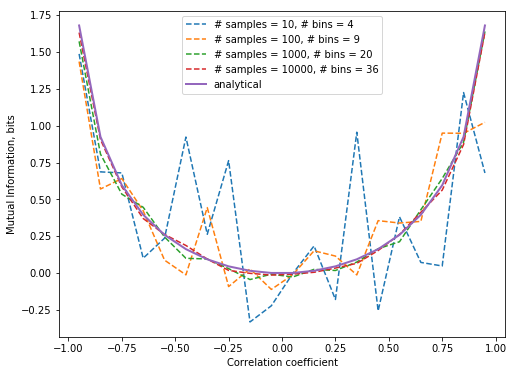

In [11]:
cs_full = np.append(cs, -1)
cs_full = np.append(cs, 1)
plt.figure(figsize = (8,6))
for i, n in enumerate(N):
    plt.plot(cs,mi_n[:,i], label = '# samples = {}, # bins = {}'.format(n, Nbins[i]), ls ='--')
plt.plot(cs_full,-0.5*np.log2(1-cs_full**2), label = 'analytical', lw = 2)
plt.legend()
# plt.ylim(-10,10)
plt.ylabel('Mutual Information, bits')
plt.xlabel('Correlation coefficient')

#### Correlation between mi and number of bins

In [138]:
data = all_data[19]
ms = []
ms_dir = []
n_range = range(2,51,2)
fraction = np.array([1/x for x in np.arange(1,3,0.2)])
for n in n_range:
    ms.append(MI(data, n))
    ms_dir.append(direct_mi(data[:,:1000], fractions = fraction, Nbins = n))

Text(0.5, 1.0, 'Sample size 100')

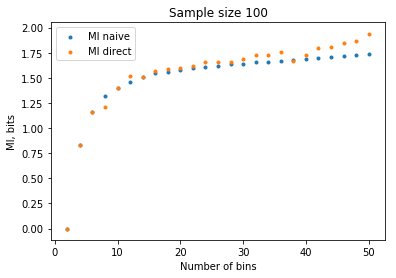

In [139]:
plt.scatter(n_range, ms, label = 'MI naive', marker = '.')
plt.scatter(n_range, ms_dir, label = 'MI direct', marker = '.')
plt.legend()
plt.ylabel('MI, bits')
plt.xlabel('Number of bins')
plt.title('Sample size 100')
#plt.ylim(0,4)
# plt.xlim(0,200)
